Задание 1. Анализ Titanic

Цель: исследовать набор данных и визуализировать базовые зависимости.

    Загрузите датасет Titanic (через ссылку или seaborn.load_dataset('titanic')).
    Постройте 3 разных типа графиков (на выбор: barplot, histplot, boxplot, countplot, scatterplot).
    Каждый график должен отвечать на конкретный вопрос, например:
        Сколько мужчин и женщин было на борту?
        Как распределяется возраст по классам?
        Есть ли связь между стоимостью билета и выживаемостью?

Подсказка: используйте подписи осей, заголовки (plt.title) и добавьте короткие выводы в текстовой ячейке Markdown.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
tit = pd.read_csv(url)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


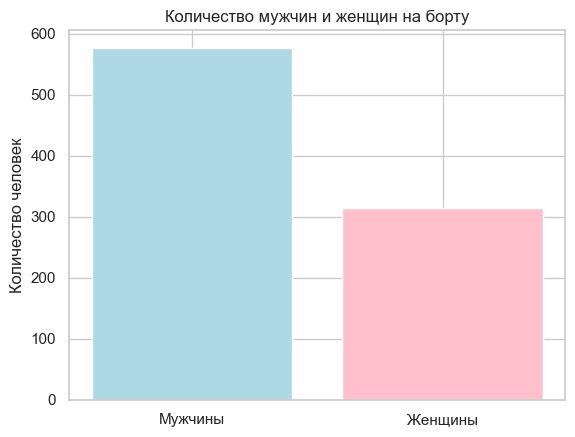

In [5]:
male = tit['Sex'].value_counts()["male"]
female = tit['Sex'].value_counts()["female"]
object = ["Мужчины","Женщины"]
perfomance = [male,female]
plt.title("Количество мужчин и женщин на борту")
plt.ylabel("Количество человек")
plt.bar(object, perfomance, color=["LightBlue","Pink"])
plt.show()

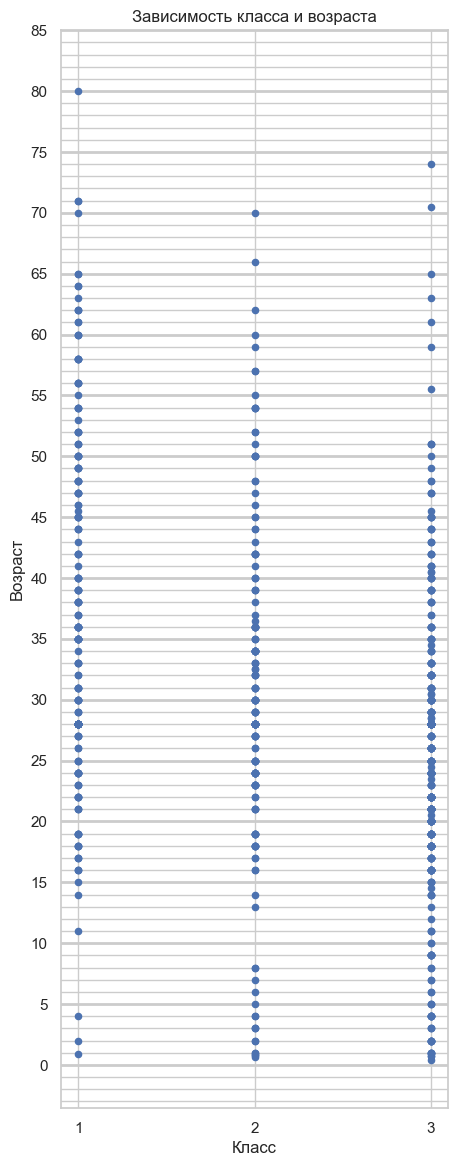

In [207]:
tit['Age'] = tit['Age'].fillna(tit['Age'].median()) #Заполнить возраст медианным значением

plt.figure(figsize=(5,14))
plt.minorticks_on() #отображение сетки по нецелым значениям
plt.grid(which='minor',axis="y")
plt.grid(which='major',axis="y",linewidth=2)
plt.scatter(tit['Pclass'], tit['Age'],s=20)
plt.xticks(np.arange(1, 4, 1)) # удаление промежуточных значений между числовыми значениями классов
plt.xlabel('Класс')
plt.ylabel('Возраст')
plt.yticks(np.arange(0,max(tit["Age"])+10,5))
plt.title('Зависимость класса и возраста')
plt.show()

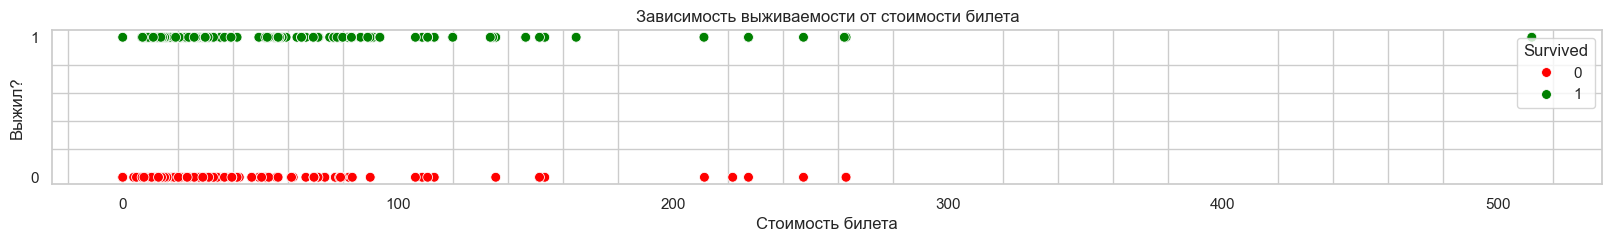

In [7]:
plt.figure(figsize=(20, 2))
sns.scatterplot(
    x='Fare', 
    y='Survived', 
    data=tit, 
    hue='Survived', # Раскрашиваем точки в зависимости от статуса выживания
    palette={0: 'red', 1: 'green'},
    s=50, # Размер точек
)
plt.title('Зависимость выживаемости от стоимости билета')
plt.xlabel('Стоимость билета')
plt.ylabel('Выжил?')
plt.yticks([0, 1])
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

Задание 2. Сравнение библиотек Matplotlib и Seaborn

Цель: понять, как отличаются подходы двух библиотек.

    Постройте один и тот же график (например, распределение возраста пассажиров)
    сначала с помощью matplotlib, затем с помощью seaborn.
    Сравните код — что проще? где понятнее результат?
    Добавьте короткий комментарий с вашим мнением.


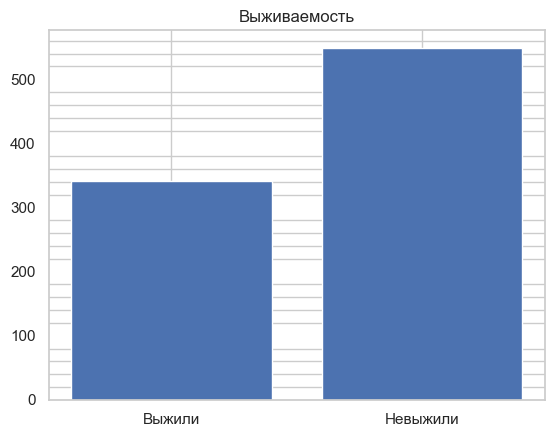

In [8]:
#Через matplotlib

surv_0 = tit['Survived'].value_counts()[0]
surv_1 = tit['Survived'].value_counts()[1]
plt.bar(["Выжили","Невыжили"],[surv_1,surv_0])
plt.minorticks_on()
plt.title("Выживаемость")
plt.grid(which="major", axis="y")
plt.grid(which="minor", axis="y")
plt.show()

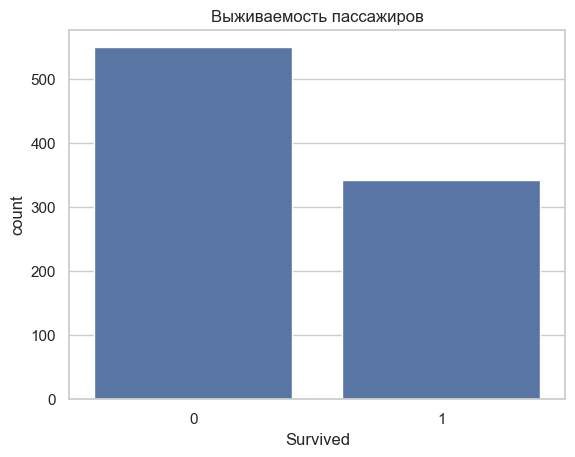

In [ ]:
#Через seaborn

sns.set(style="whitegrid")
sns.countplot(x='Survived', data=tit)
plt.title("Выживаемость пассажиров")
plt.show()

Seaborn локаничнее и проще, но matplotlib более тонкий в настройке. В понятности выигрывает matplotlib (по личным впечатлениям)

Задание 3. Мини-проект: «Что влияет на выживаемость?»

Цель: применить визуализацию для анализа зависимостей.

    Проанализируйте, какие признаки могли повлиять на выживаемость (Survived):

    Пол (Sex)
    Класс (Pclass)
    Возраст (Age)
    Стоимость билета (Fare)

    Постройте минимум 2 графика, которые помогут сделать вывод.

    Сформулируйте короткий вывод (2–3 предложения) в текстовой ячейке:

    Кто имел больше шансов выжить?
    Есть ли заметные различия между группами?

Подсказка: можно использовать sns.barplot, sns.violinplot или sns.boxplot.

C:\Users\stepg\AppData\Local\Temp\ipykernel_17964\4033913028.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tit,x=tit["Sex"],y=tit["Survived"],palette=["Blue","Pink"], estimator=sum)


Выжило больше женщин, чем мужчин: 233


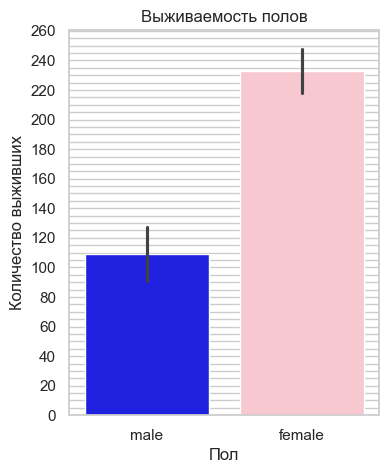

In [ ]:
plt.figure(figsize=[4,5])
plt.title("Выживаемость полов")
plt.minorticks_on()
plt.ylabel("Количество выживших")
plt.yticks(np.arange(0,tit["Survived"].sum()+10,20))
plt.grid(axis="y",which="minor")
plt.xlabel("Пол")
sns.barplot(tit,x=tit["Sex"],y=tit["Survived"],palette=["Blue","Pink"], estimator=sum) #отображение общего количества выживших по y и полов по x

#не особо нужный код, но он автоматизирует определение наибольшего количества выживших в определённом поле
if tit.groupby('Sex')['Survived'].sum()["female"] > tit.groupby('Sex')['Survived'].sum()["male"]:
    print(f"Выжило больше женщин, чем мужчин: {max([tit.groupby('Sex')['Survived'].sum()["female"],tit.groupby('Sex')['Survived'].sum()["male"]])}")
elif tit.groupby('Sex')['Survived'].sum()["female"] < tit.groupby('Sex')['Survived'].sum()["male"]:
    print(f"Выжило больше мужчин, чем женщин: {min([tit.groupby('Sex')['Survived'].sum()["female"],tit.groupby('Sex')['Survived'].sum()["male"]])}")
else:
    print("Выжило равное количество")


C:\Users\stepg\AppData\Local\Temp\ipykernel_17964\834971848.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tit,x=tit["Pclass"],y=tit["Survived"],palette=["Red","Yellow","Grey"], estimator=sum)


Наибольшая выживаемость у 1'го класса: 136


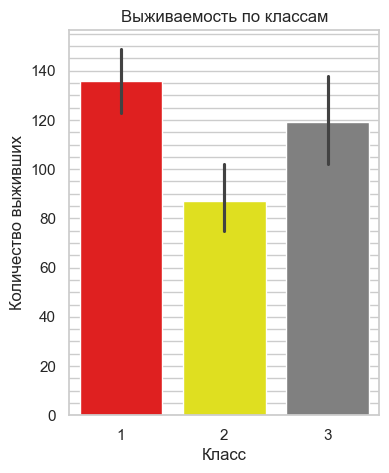

In [258]:
plt.figure(figsize=[4,5])
plt.title("Выживаемость по классам")
plt.minorticks_on()
plt.ylabel("Количество выживших")
plt.yticks(np.arange(0,tit["Survived"].sum(),20))
plt.grid(axis="y",which="minor")
plt.xlabel("Класс")
sns.barplot(tit,x=tit["Pclass"],y=tit["Survived"],palette=["Red","Yellow","Grey"], estimator=sum)

#аналогично предыдущей диаграмме. автоматизация определения самого живучего класса
maxlst = []
for i in range(min(tit.groupby('Pclass')['Survived'].sum().keys()),max(tit.groupby('Pclass')['Survived'].sum().keys())+1):
    maxlst.append(tit.groupby('Pclass')['Survived'].sum()[i])
spis = [
    pclass
    for pclass, count in tit.groupby('Pclass')['Survived'].sum().to_dict().items() 
    if count == max(maxlst)
]
print(f"Наибольшая выживаемость у {spis[0]}'го класса: {max(maxlst)}")


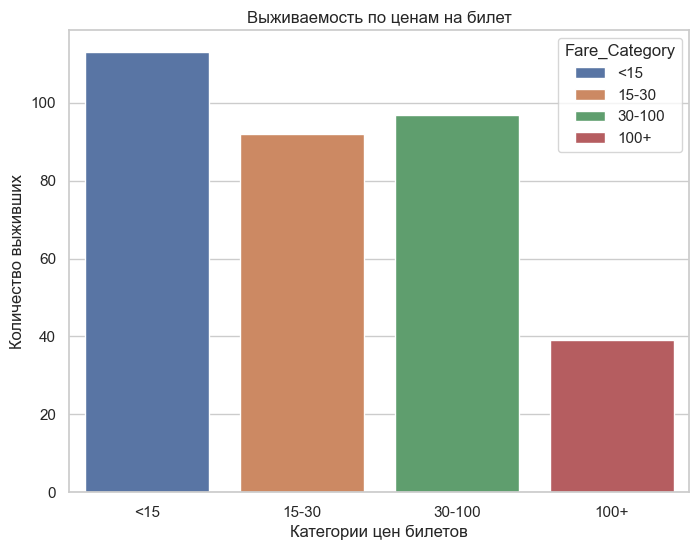

Наибольшая выживаемость у ценовой категории <15: 136


C:\Users\stepg\AppData\Local\Temp\ipykernel_17964\1016207251.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  maxlst1.append(tit.groupby('Fare_Category')['Survived'].sum()[i])
C:\Users\stepg\AppData\Local\Temp\ipykernel_17964\1016207251.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxlst1.append(tit.groupby('Fare_Category')['Survived'].sum()[i])


In [271]:
# создаём 4 категорий цен
tit['Fare_Category'] = pd.cut(tit['Fare'], bins=[0, 15, 30, 100, 513], labels=['<15', '15-30', '30-100', '100+'])

plt.figure(figsize=[8, 6])
plt.title("Выживаемость по ценам на билет")
plt.ylabel("Количество выживших")
plt.xlabel("Категории цен билетов")
sns.barplot(x='Fare_Category', y='Survived', data=tit, errorbar=None, estimator=sum, hue="Fare_Category") 
plt.show()
maxlst1 = []
for i in range(1,len(['<15', '15-30', '30-100', '100+'])):
    maxlst1.append(tit.groupby('Fare_Category')['Survived'].sum()[i])
spis1 = [
    fare
    for fare, count1 in tit.groupby('Fare')['Survived'].sum().to_dict().items() 
    if count1 == max(maxlst1)
]
print(f"Наибольшая выживаемость у ценовой категории {['<15', '15-30', '30-100', '100+'][spis[0]-1]}: {max(maxlst)}")


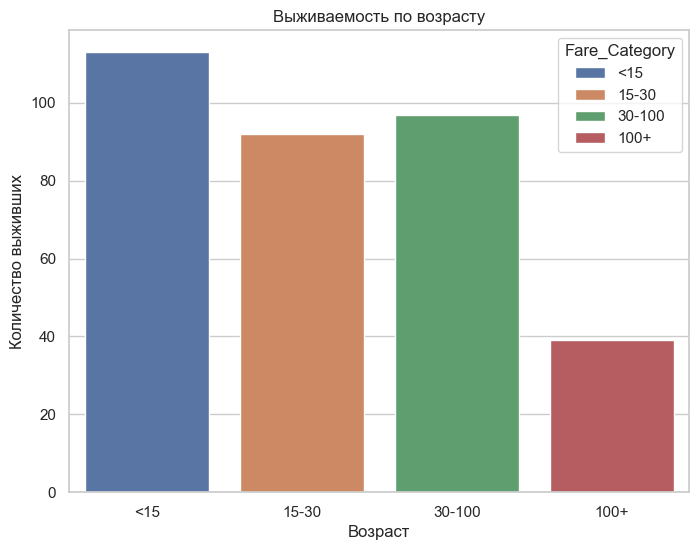

C:\Users\stepg\AppData\Local\Temp\ipykernel_17964\579363456.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  maxlst2.append(tit.groupby('Age_Category')['Survived'].sum()[i])
C:\Users\stepg\AppData\Local\Temp\ipykernel_17964\579363456.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxlst2.append(tit.groupby('Age_Category')['Survived'].sum()[i])


IndexError: list index out of range

In [274]:
# создаём 4 категорий цен
tit['Age_Category'] = pd.cut(tit['Age'], bins=[0, 18, 65, 513], labels=['<18', '18-65', '65+'])

plt.figure(figsize=[8, 6])
plt.title("Выживаемость по возрасту")
plt.ylabel("Количество выживших")
plt.xlabel("Возраст")
sns.barplot(x='Fare_Category', y='Survived', data=tit, errorbar=None, estimator=sum, hue="Fare_Category") 
plt.show()
maxlst2 = []
for i in range(1,len(['<18', '18-65', '65+'])):
    maxlst2.append(tit.groupby('Age_Category')['Survived'].sum()[i])
spis2 = [
    age
    for age, count2 in tit.groupby('Age')['Survived'].sum().to_dict().items() 
    if count2 == max(maxlst2)
]
print(f"Наибольшая выживаемость у возрастной категории {['<18', '18-65', '65+'][spis2[0]]}: {max(maxlst2)}")


Итог: спопоставление цены и выживаемости сильно портит общий вывод, однако если допустить, что ценовые диапазоны не так важны, то можно сделать вывод, что шансы на выживание выше чем у остальных у женщин, едущих в первом классе